In [42]:
import pandas as pd
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
path = "/Users/rmania/repos/Kaufland Case/kaufland%2Fkaufland"

In [7]:
#I have created a file with some more observations in order to be able to test aggregation capabilities
data = pd.read_csv("/Users/rmania/repos/Kaufland Case/kaufland%2Fkaufland/20180920_Kaufland_case_IoT_and_predictive_maintenance.csv",\
                   sep = ';', parse_dates = [2,3,4])

In [3]:
# standardize the column names
def StandardizeNames(df):
    l = df.columns
    #pdb.set_trace()
    cols = [c.replace('ifm_analysis_sensordata_for_datathon_final.','').
              lower() for c in l]
    return cols

In [8]:
data.columns = StandardizeNames(data)

In [9]:
data.columns

Index(['machine_name', 'sensor_type', 'date_measurement', 'start_timestamp',
       'end_timestamp', 'realvalue', 'unit'],
      dtype='object')

In [10]:
machine_names = pd.DataFrame(data['machine_name'].value_counts())

In [11]:
sensor_types = pd.DataFrame(data['sensor_type'].value_counts())

In [13]:
for machine in machine_names.index:
    for sensor in sensor_types.index:
        print(machine+'_'+sensor)
        vars()[machine+'_'+sensor] = pd.DataFrame(data[(data['machine_name'] == machine) & (data['sensor_type']==sensor)])

RBG7_lifting_motor_a_max
RBG7_lifting_gear_a_max
RBG7_idle_wheel_a_max
RBG7_drive_wheel_a_max
RBG7_drive_motor_a_max
RBG7_drive_gear_a_max
RBG7_drive_wheel_V_eff
RBG7_lifting_motor_V_eff
RBG7_idle_wheel_V_eff
RBG7_lifting_gear_V_eff
RBG7_drive_motor_V_eff
RBG7_drive_gear_V_eff
RBG1_lifting_motor_a_max
RBG1_lifting_gear_a_max
RBG1_idle_wheel_a_max
RBG1_drive_wheel_a_max
RBG1_drive_motor_a_max
RBG1_drive_gear_a_max
RBG1_drive_wheel_V_eff
RBG1_lifting_motor_V_eff
RBG1_idle_wheel_V_eff
RBG1_lifting_gear_V_eff
RBG1_drive_motor_V_eff
RBG1_drive_gear_V_eff
RBG2_lifting_motor_a_max
RBG2_lifting_gear_a_max
RBG2_idle_wheel_a_max
RBG2_drive_wheel_a_max
RBG2_drive_motor_a_max
RBG2_drive_gear_a_max
RBG2_drive_wheel_V_eff
RBG2_lifting_motor_V_eff
RBG2_idle_wheel_V_eff
RBG2_lifting_gear_V_eff
RBG2_drive_motor_V_eff
RBG2_drive_gear_V_eff
RBG3_lifting_motor_a_max
RBG3_lifting_gear_a_max
RBG3_idle_wheel_a_max
RBG3_drive_wheel_a_max
RBG3_drive_motor_a_max
RBG3_drive_gear_a_max
RBG3_drive_wheel_V_eff
RBG3

In [15]:
sensors_list = ['lifting_gear',
'lifting_motor',
'drive_wheel',
'idle_wheel',
'drive_gear',
'drive_motor']

In [17]:
dsets_list = [RBG7_lifting_motor_a_max,
RBG7_lifting_gear_a_max,
RBG7_idle_wheel_a_max,
RBG7_drive_wheel_a_max,
RBG7_drive_motor_a_max,
RBG7_drive_gear_a_max,
RBG7_drive_wheel_V_eff,
RBG7_lifting_motor_V_eff,
RBG7_idle_wheel_V_eff,
RBG7_lifting_gear_V_eff,
RBG7_drive_motor_V_eff,
RBG7_drive_gear_V_eff,
RBG1_lifting_motor_a_max,
RBG1_lifting_gear_a_max,
RBG1_idle_wheel_a_max,
RBG1_drive_wheel_a_max,
RBG1_drive_motor_a_max,
RBG1_drive_gear_a_max,
RBG1_drive_wheel_V_eff,
RBG1_lifting_motor_V_eff,
RBG1_idle_wheel_V_eff,
RBG1_lifting_gear_V_eff,
RBG1_drive_motor_V_eff,
RBG1_drive_gear_V_eff,
RBG2_lifting_motor_a_max,
RBG2_lifting_gear_a_max,
RBG2_idle_wheel_a_max,
RBG2_drive_wheel_a_max,
RBG2_drive_motor_a_max,
RBG2_drive_gear_a_max,
RBG2_drive_wheel_V_eff,
RBG2_lifting_motor_V_eff,
RBG2_idle_wheel_V_eff,
RBG2_lifting_gear_V_eff,
RBG2_drive_motor_V_eff,
RBG2_drive_gear_V_eff,
RBG3_lifting_motor_a_max,
RBG3_lifting_gear_a_max,
RBG3_idle_wheel_a_max,
RBG3_drive_wheel_a_max,
RBG3_drive_motor_a_max,
RBG3_drive_gear_a_max,
RBG3_drive_wheel_V_eff,
RBG3_lifting_motor_V_eff,
RBG3_idle_wheel_V_eff,
RBG3_lifting_gear_V_eff,
RBG3_drive_motor_V_eff,
RBG3_drive_gear_V_eff,
RBG4_lifting_motor_a_max,
RBG4_lifting_gear_a_max,
RBG4_idle_wheel_a_max,
RBG4_drive_wheel_a_max,
RBG4_drive_motor_a_max,
RBG4_drive_gear_a_max,
RBG4_drive_wheel_V_eff,
RBG4_lifting_motor_V_eff,
RBG4_idle_wheel_V_eff,
RBG4_lifting_gear_V_eff,
RBG4_drive_motor_V_eff,
RBG4_drive_gear_V_eff,
RBG6_lifting_motor_a_max,
RBG6_lifting_gear_a_max,
RBG6_idle_wheel_a_max,
RBG6_drive_wheel_a_max,
RBG6_drive_motor_a_max,
RBG6_drive_gear_a_max,
RBG6_drive_wheel_V_eff,
RBG6_lifting_motor_V_eff,
RBG6_idle_wheel_V_eff,
RBG6_lifting_gear_V_eff,
RBG6_drive_motor_V_eff,
RBG6_drive_gear_V_eff,
RBG5_lifting_motor_a_max,
RBG5_lifting_gear_a_max,
RBG5_idle_wheel_a_max,
RBG5_drive_wheel_a_max,
RBG5_drive_motor_a_max,
RBG5_drive_gear_a_max,
RBG5_drive_wheel_V_eff,
RBG5_lifting_motor_V_eff,
RBG5_idle_wheel_V_eff,
RBG5_lifting_gear_V_eff,
RBG5_drive_motor_V_eff,
RBG5_drive_gear_V_eff]

In [18]:
dsets_string = ['RBG7_lifting_motor_a_max',
'RBG7_lifting_gear_a_max',
'RBG7_idle_wheel_a_max',
'RBG7_drive_wheel_a_max',
'RBG7_drive_motor_a_max',
'RBG7_drive_gear_a_max',
'RBG7_drive_wheel_V_eff',
'RBG7_lifting_motor_V_eff',
'RBG7_idle_wheel_V_eff',
'RBG7_lifting_gear_V_eff',
'RBG7_drive_motor_V_eff',
'RBG7_drive_gear_V_eff',
'RBG1_lifting_motor_a_max',
'RBG1_lifting_gear_a_max',
'RBG1_idle_wheel_a_max',
'RBG1_drive_wheel_a_max',
'RBG1_drive_motor_a_max',
'RBG1_drive_gear_a_max',
'RBG1_drive_wheel_V_eff',
'RBG1_lifting_motor_V_eff',
'RBG1_idle_wheel_V_eff',
'RBG1_lifting_gear_V_eff',
'RBG1_drive_motor_V_eff',
'RBG1_drive_gear_V_eff',
'RBG2_lifting_motor_a_max',
'RBG2_lifting_gear_a_max',
'RBG2_idle_wheel_a_max',
'RBG2_drive_wheel_a_max',
'RBG2_drive_motor_a_max',
'RBG2_drive_gear_a_max',
'RBG2_drive_wheel_V_eff',
'RBG2_lifting_motor_V_eff',
'RBG2_idle_wheel_V_eff',
'RBG2_lifting_gear_V_eff',
'RBG2_drive_motor_V_eff',
'RBG2_drive_gear_V_eff',
'RBG3_lifting_motor_a_max',
'RBG3_lifting_gear_a_max',
'RBG3_idle_wheel_a_max',
'RBG3_drive_wheel_a_max',
'RBG3_drive_motor_a_max',
'RBG3_drive_gear_a_max',
'RBG3_drive_wheel_V_eff',
'RBG3_lifting_motor_V_eff',
'RBG3_idle_wheel_V_eff',
'RBG3_lifting_gear_V_eff',
'RBG3_drive_motor_V_eff',
'RBG3_drive_gear_V_eff',
'RBG4_lifting_motor_a_max',
'RBG4_lifting_gear_a_max',
'RBG4_idle_wheel_a_max',
'RBG4_drive_wheel_a_max',
'RBG4_drive_motor_a_max',
'RBG4_drive_gear_a_max',
'RBG4_drive_wheel_V_eff',
'RBG4_lifting_motor_V_eff',
'RBG4_idle_wheel_V_eff',
'RBG4_lifting_gear_V_eff',
'RBG4_drive_motor_V_eff',
'RBG4_drive_gear_V_eff',
'RBG6_lifting_motor_a_max',
'RBG6_lifting_gear_a_max',
'RBG6_idle_wheel_a_max',
'RBG6_drive_wheel_a_max',
'RBG6_drive_motor_a_max',
'RBG6_drive_gear_a_max',
'RBG6_drive_wheel_V_eff',
'RBG6_lifting_motor_V_eff',
'RBG6_idle_wheel_V_eff',
'RBG6_lifting_gear_V_eff',
'RBG6_drive_motor_V_eff',
'RBG6_drive_gear_V_eff',
'RBG5_lifting_motor_a_max',
'RBG5_lifting_gear_a_max',
'RBG5_idle_wheel_a_max',
'RBG5_drive_wheel_a_max',
'RBG5_drive_motor_a_max',
'RBG5_drive_gear_a_max',
'RBG5_drive_wheel_V_eff',
'RBG5_lifting_motor_V_eff',
'RBG5_idle_wheel_V_eff',
'RBG5_lifting_gear_V_eff',
'RBG5_drive_motor_V_eff',
'RBG5_drive_gear_V_eff']

In [19]:
dsets = pd.DataFrame([dsets_list, dsets_string])

In [21]:
#Aggregate on daily basis - min, max, mean, spread, etc.
def daily_aggr(data):
    return pd.DataFrame({'Daily_min': data['realvalue'].groupby(data['date_measurement']).min(), \
                           'Daily_max': data['realvalue'].groupby(data['date_measurement']).max(), \
                           'Daily_mean': data['realvalue'].groupby(data['date_measurement']).mean(), \
                           'Daily_spread': data['realvalue'].groupby(data['date_measurement']).max() - \
                           data['realvalue'].groupby(data['date_measurement']).min()})

In [22]:
for dset in dsets_list:
    dset['hour'] = [dset['start_timestamp'][x].hour for x in dset.index]
    dset['Pct_change'] = dset['realvalue'].pct_change()

In [23]:
for i in range(len(dsets_list)):
#    print(vars()[dsets_string[i] + '_aggr_daily'])
    vars()[dsets_string[i] + '_aggr_daily'] = pd.DataFrame({
    'Max_value': dsets_list[i].groupby(['date_measurement'])['realvalue'].max(),\
    'Count_measurements': dsets_list[i].groupby(['date_measurement'])['hour'].nunique()}).reset_index()

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
RBG1_drive_wheel_V_eff_aggr_daily.columns

Index(['date_measurement', 'Count_measurements', 'Max_value'], dtype='object')

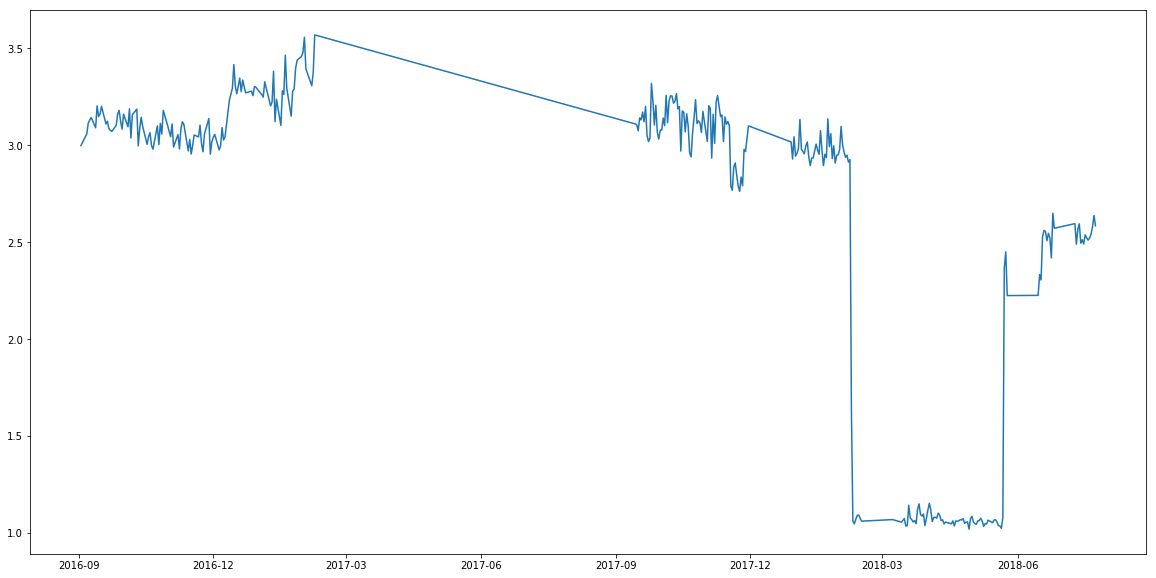

In [26]:
plt.figure(figsize = (20,10))
plt.plot(RBG1_drive_wheel_V_eff_aggr_daily["date_measurement"], RBG1_drive_wheel_V_eff_aggr_daily['Max_value'])
plt.show()

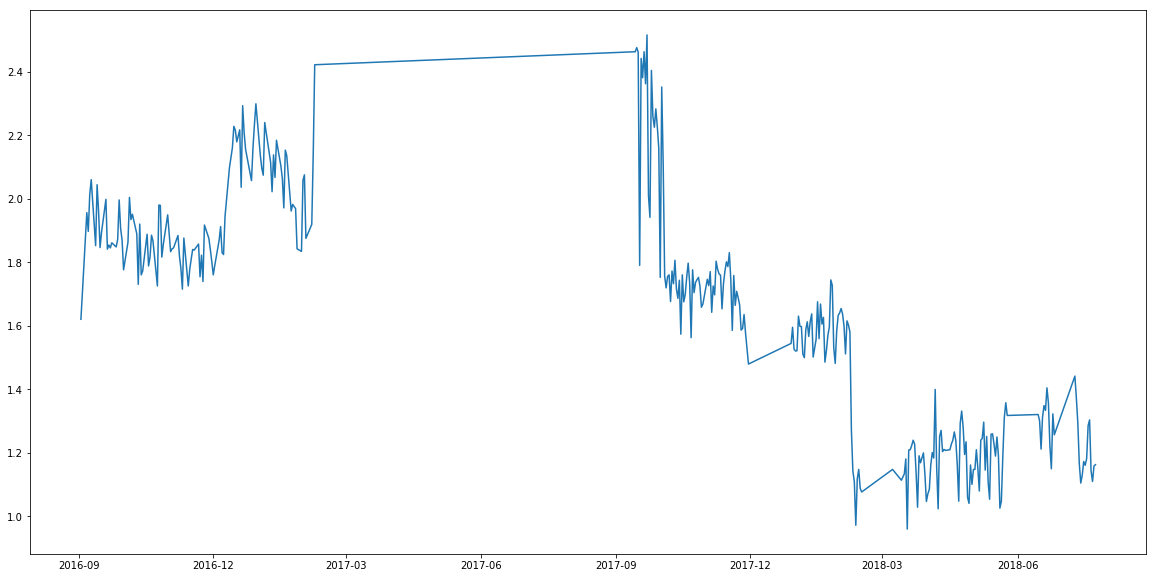

In [29]:
plt.figure(figsize = (20,10))
plt.plot(RBG1_drive_gear_V_eff_aggr_daily["date_measurement"], RBG1_drive_gear_V_eff_aggr_daily['Max_value'])

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(RBG1_drive_gear_V_eff_aggr_daily['Max_value'])

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
#Time series is non-stationary

ADF Statistic: -1.143062
p-value: 0.697598
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [32]:
first_diff_RBG1_drive_gear_V = RBG1_drive_gear_V_eff_aggr_daily['Max_value'].diff()

In [36]:
result2 = adfuller(first_diff_RBG1_drive_gear_V[1:])

In [37]:
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
	print('\t%s: %.3f' % (key, value))
#Time series is stationary

ADF Statistic: -7.655167
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [33]:
dates_empty_df = pd.DataFrame([], index = pd.DatetimeIndex(start = '2016-09-02 00:00:00',\
                                                       end = '2018-07-24 00:00:00', \
                                                       freq = 'D'))

In [51]:
RBG1_drive_gear_V_eff_alldates = dates_empty_df.merge(RBG1_drive_gear_V_eff_aggr_daily, how = 'outer',\
                                                      left_index = True, \
                                                     right_on = 'date_measurement').set_index('date_measurement')

In [60]:
RBG1_drive_gear_V_eff_alldates['Max_value'].fillna(method = 'backfill', inplace = True)

In [39]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff_RBG1_drive_gear_V[1:], nlags = 31)
lag_pacf = pacf(first_diff_RBG1_drive_gear_V[1:], nlags = 31)

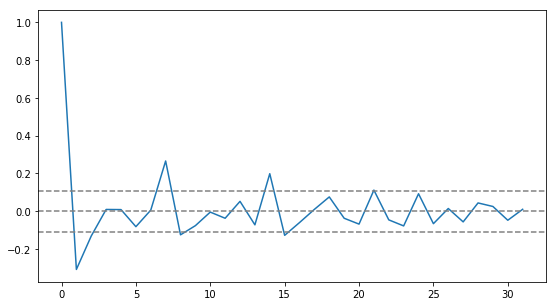

In [40]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(first_diff_RBG1_drive_gear_V)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(first_diff_RBG1_drive_gear_V)), linestyle = '--', color = 'gray')

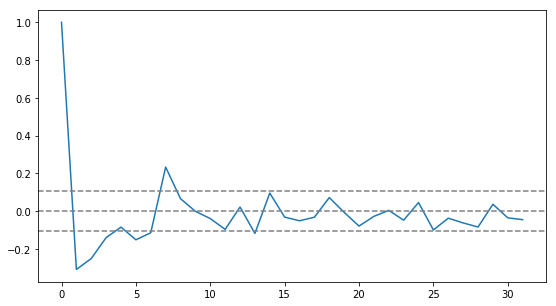

In [41]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(first_diff_RBG1_drive_gear_V)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(first_diff_RBG1_drive_gear_V)), linestyle = '--', color = 'gray')

In [61]:
first_diff_RBG1_drive_gear_V = RBG1_drive_gear_V_eff_alldates['Max_value'].diff()

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

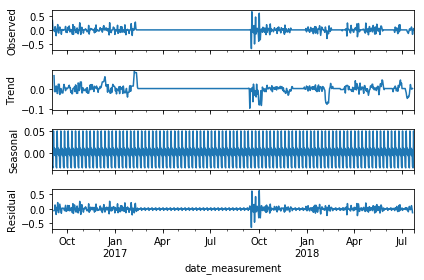

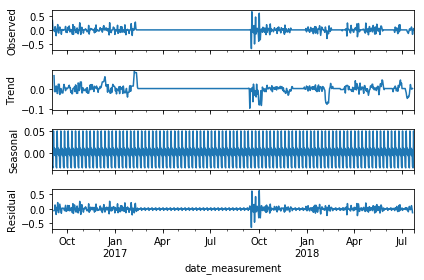

In [62]:
result = seasonal_decompose(first_diff_RBG1_drive_gear_V[1:], model = 'additive')
result.plot()

In [63]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


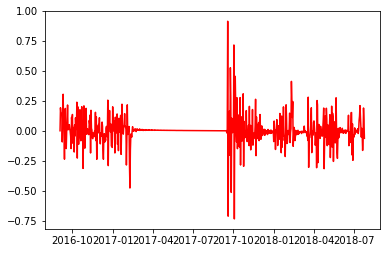

In [64]:
model = ARIMA(first_diff_RBG1_drive_gear_V[1:],order = (7,1,8))
resullts_ARIMA = model.fit()
plt.plot(resullts_ARIMA.fittedvalues, color = 'red')

In [65]:
pd.DataFrame({'Params': resullts_ARIMA.params, 'P_values': resullts_ARIMA.pvalues})

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,P_values,Params
const,5.011276e-01,-0.000009
ar.L1.D.Max_value,1.579384e-18,-1.417103
ar.L2.D.Max_value,1.015371e-07,-1.638638
ar.L3.D.Max_value,1.160920e-12,-1.640522
ar.L4.D.Max_value,NaN,-1.359838
ar.L5.D.Max_value,9.175674e-07,-0.820711
ar.L6.D.Max_value,4.503752e-08,-0.576184
ar.L7.D.Max_value,NaN,0.035671
ma.L1.D.Max_value,6.855286e-01,0.058425
ma.L2.D.Max_value,NaN,-0.054812


In [66]:
from scipy.fftpack import fft

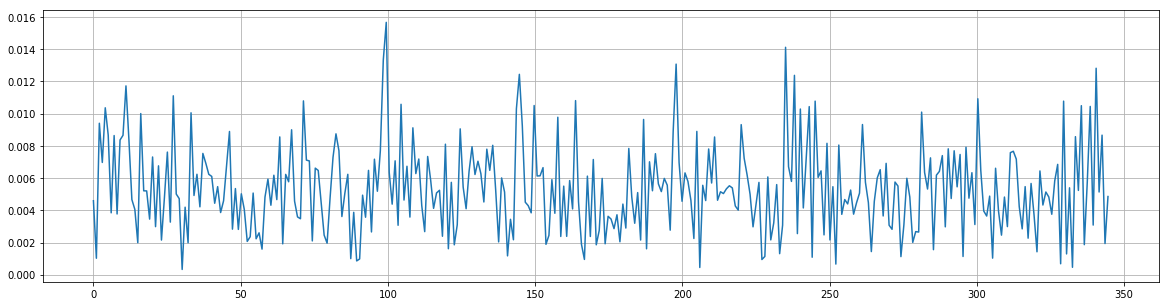

In [67]:
# Number of sample points
N = resullts_ARIMA.resid.shape[0]
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0*2.0*np.pi*x)
#yf = fft(result.resid[3:])
yf = fft(resullts_ARIMA.resid)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize = (20, 5))
plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()


In [69]:
RBG1_drive_gear_V_eff_alldates_NA = dates_empty_df.merge(RBG1_drive_gear_V_eff_aggr_daily, how = 'outer',\
                                                      left_index = True, \
                                                     right_on = 'date_measurement').set_index('date_measurement')
RBG1_drive_gear_V_eff_alldates_NA['Missing_obs'] = np.where(RBG1_drive_gear_V_eff_alldates_NA['Max_value'] > 0, \
                                                            0, 1)

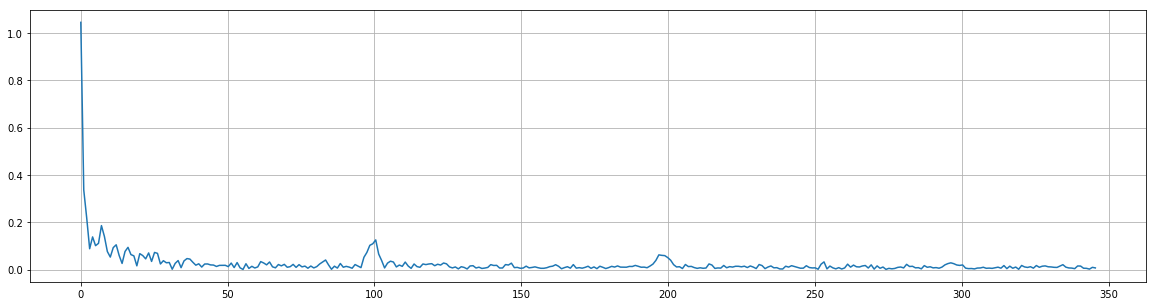

In [70]:
# Number of sample points
N = RBG1_drive_gear_V_eff_alldates_NA['Missing_obs'].shape[0]
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0*2.0*np.pi*x)
#yf = fft(result.resid[3:])
yf = fft(RBG1_drive_gear_V_eff_alldates_NA['Missing_obs'])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize = (20, 5))
plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [71]:
RBG7_drive_gear_V_eff_alldates_NA = dates_empty_df.merge(RBG7_drive_gear_V_eff_aggr_daily, how = 'outer',\
                                                      left_index = True, \
                                                     right_on = 'date_measurement').set_index('date_measurement')
RBG7_drive_gear_V_eff_alldates_NA['Missing_obs'] = np.where(RBG7_drive_gear_V_eff_alldates_NA['Max_value'] > 0, \
                                                            0, 1)

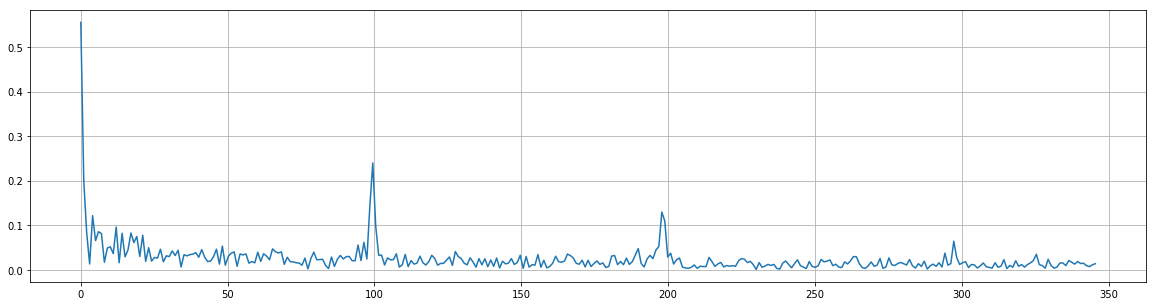

In [72]:
# Number of sample points
N = RBG7_drive_gear_V_eff_alldates_NA['Missing_obs'].shape[0]
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0*2.0*np.pi*x)
#yf = fft(result.resid[3:])
yf = fft(RBG7_drive_gear_V_eff_alldates_NA['Missing_obs'])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize = (20, 5))
plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

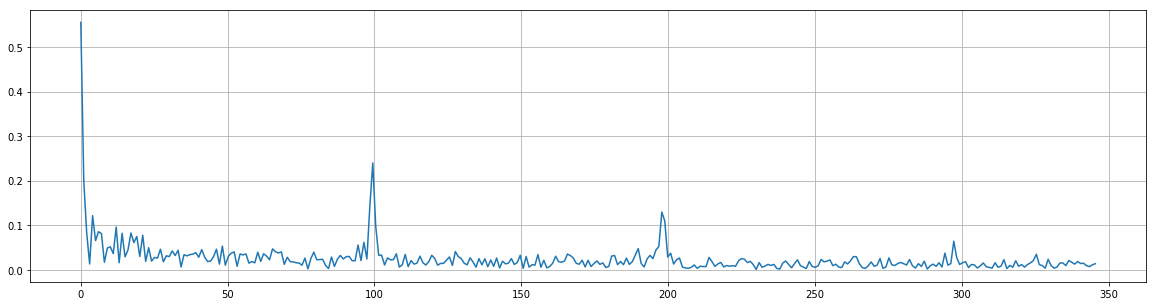

In [73]:
RBG7_drive_gear_a_max_alldates_NA = dates_empty_df.merge(RBG7_drive_gear_a_max_aggr_daily, how = 'outer',\
                                                      left_index = True, \
                                                     right_on = 'date_measurement').set_index('date_measurement')
RBG7_drive_gear_a_max_alldates_NA['Missing_obs'] = np.where(RBG7_drive_gear_a_max_alldates_NA['Max_value'] > 0, \
                                                            0, 1)
# Number of sample points
N = RBG7_drive_gear_a_max_alldates_NA['Missing_obs'].shape[0]
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)
yf = fft(RBG7_drive_gear_a_max_alldates_NA['Missing_obs'])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize = (20, 5))
plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [74]:
count = 0
RBG7_drive_gear_a_max_alldates_NA['Nr_days_missing'] = pd.Series([])
for i in range(RBG7_drive_gear_a_max_alldates_NA.shape[0]):
    if RBG7_drive_gear_a_max_alldates_NA['Missing_obs'][i] == 1:
        count+=1
    else:
        for j in range(count):
            RBG7_drive_gear_a_max_alldates_NA['Nr_days_missing'][i-j-1] = count 
        count = 0
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
count = 0
RBG1_drive_gear_V_eff_alldates_NA['Nr_days_missing'] = pd.Series([])
for i in range(RBG1_drive_gear_V_eff_alldates_NA.shape[0]):
    if RBG1_drive_gear_V_eff_alldates_NA['Missing_obs'][i] == 1:
        count+=1
    else:
        for j in range(count):
            RBG1_drive_gear_V_eff_alldates_NA['Nr_days_missing'][i-j-1] = count 
        count = 0
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
pd.DataFrame({'RBG1': RBG1_drive_gear_V_eff_alldates_NA['Nr_days_missing'].value_counts(),\
              'RBG7': RBG7_drive_gear_a_max_alldates_NA['Nr_days_missing'].value_counts()})

,RBG1,RBG7
1.0,6.0,9.0
2.0,40.0,70.0
3.0,12.0,30.0
4.0,NaN,12.0
5.0,5.0,NaN
6.0,NaN,6.0
7.0,NaN,14.0
9.0,NaN,9.0
11.0,NaN,11.0
13.0,13.0,NaN
